In [65]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv('train_flights_complete_raw200.csv', index_col=[0])

In [112]:
origCity_percDelay = df.groupby('origin_city')['delay_binary'].mean().reset_index(name='perc_delay').sort_values(by='perc_delay', ascending=False).head(10)

In [113]:
origCity_percDelay['perc_delay'] = origCity_percDelay['perc_delay']*100

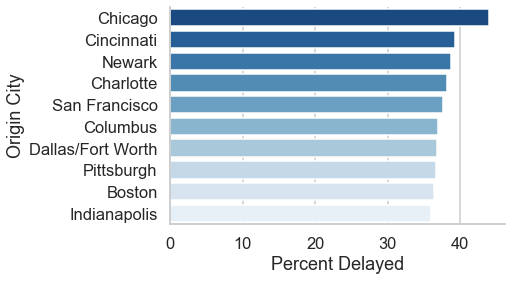

In [114]:
ax1 = plt.subplots()
ax1 = sns.barplot(data=origCity_percDelay, x='perc_delay', y='origin_city', palette='Blues_r')
sns.set_context('talk')
sns.set_style('whitegrid')
plt.xlabel('Percent Delayed')
plt.ylabel('Origin City')
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)

In [159]:
delayed_flights = df.loc[df['arr_delay_pos']>0].copy()

In [116]:
origCity_meanDelay = delayed_flights.groupby('origin_city')['arr_delay_pos'].mean().reset_index(name='mean_delay').sort_values(by='mean_delay', ascending=False).head(10)

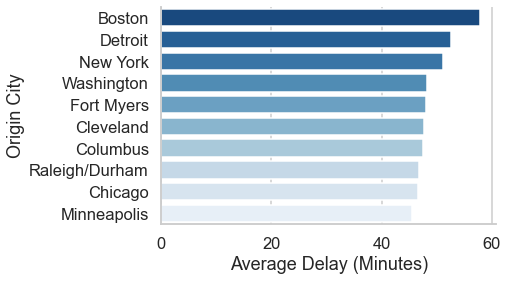

In [117]:
ax=plt.subplots()
ax = sns.barplot(data=origCity_meanDelay, x='mean_delay', y='origin_city', palette='Blues_r')
sns.set_context('talk')
sns.set_style('whitegrid')
plt.xlabel('Average Delay (Minutes)')
plt.ylabel('Origin City')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)


In [118]:
routes = df['origin_city'] + "-" + df['dest_city']

In [119]:
routes = routes.value_counts().reset_index(name='num_flights').head(10)

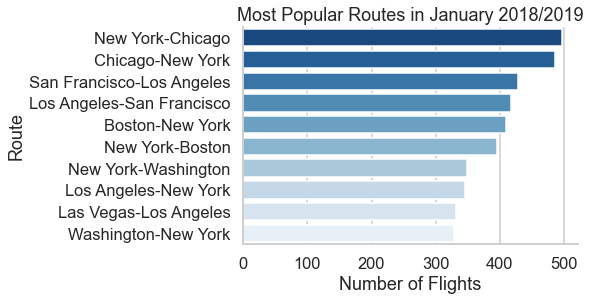

In [121]:
ax2=plt.subplots()
ax2=sns.barplot(data=routes, x='num_flights', y='index', palette='Blues_r')
sns.set_context('talk')
sns.set_style('whitegrid')
plt.xlabel('Number of Flights')
plt.ylabel('Route')
plt.title('Most Popular Routes in January 2018/2019')
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)

In [160]:
carrier_delay = delayed_flights.groupby('mkt_unique_carrier')['arr_delay_pos'].mean().reset_index().sort_values(by='arr_delay_pos', ascending=False)

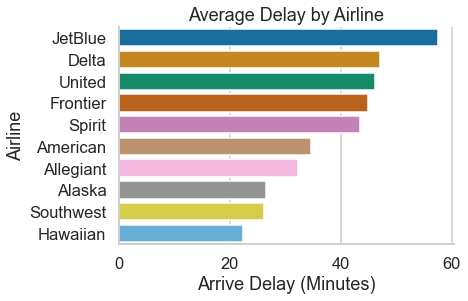

In [209]:
ax3=plt.subplots()
ax3=sns.barplot(data=carrier_delay, x='arr_delay_pos', y='mkt_unique_carrier', palette='colorblind')
sns.set_context('talk')
sns.set_style('whitegrid')
plt.xlabel('Arrive Delay (Minutes)')
plt.ylabel('Airline')
plt.title('Average Delay by Airline')
ylabels=['JetBlue','Delta','United','Frontier', 'Spirit','American','Allegiant','Alaska','Southwest','Hawaiian']
ax3.set_yticklabels(ylabels)
ax3.spines.right.set_visible(False)
ax3.spines.top.set_visible(False)

In [125]:
df['snow_binary'] = df['SNOW']

In [127]:
df.loc[df['snow_binary']>0, 'snow_binary']=1

In [130]:
snow_delay = df.groupby('snow_binary')['delay_binary'].mean().reset_index()

In [131]:
snow_delay

,snow_binary,delay_binary
0,0.0,0.319314
1,1.0,0.564434


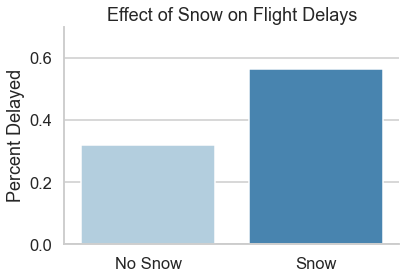

In [141]:
ax4=plt.subplots()
ax4=sns.barplot(data=snow_delay, x='snow_binary', y='delay_binary', palette='Blues')
sns.set_context('talk')
sns.set_style('whitegrid')
ax4.set_xticklabels(['No Snow', 'Snow'])
ax4.set_ylim(0,0.7)
plt.xlabel('')
plt.ylabel('Percent Delayed')
plt.title('Effect of Snow on Flight Delays')
ax4.spines.right.set_visible(False)
ax4.spines.top.set_visible(False)

In [153]:
df['percip_binary'] = df['PRCP']

In [154]:
df.loc[df['percip_binary']>0, 'percip_binary']=1

In [155]:
rain_delay = df.groupby('percip_binary')['delay_binary'].mean().reset_index()

In [156]:
rain_delay

,percip_binary,delay_binary
0,0.0,0.308060
1,1.0,0.407438


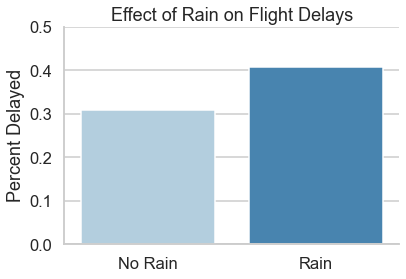

In [157]:
ax5=plt.subplots()
ax5=sns.barplot(data=rain_delay, x='percip_binary', y='delay_binary', palette='Blues')
sns.set_context('talk')
sns.set_style('whitegrid')
ax5.set_xticklabels(['No Rain', 'Rain'])
ax5.set_ylim(0,0.5)
plt.xlabel('')
plt.ylabel('Percent Delayed')
plt.title('Effect of Rain on Flight Delays')
ax5.spines.right.set_visible(False)
ax5.spines.top.set_visible(False)

In [188]:
depHour_delay = df.groupby('dep_tod')['delay_binary'].mean().reset_index()

In [189]:
df.crs_dep_hour.nunique()

22

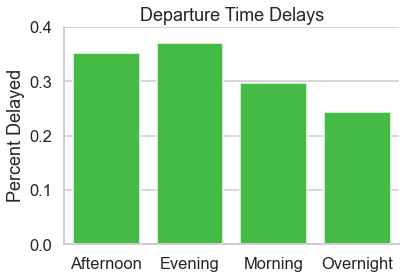

In [197]:
ax6=plt.subplots()
ax6=sns.barplot(data=depHour_delay, x='dep_tod', y='delay_binary', color='limegreen')
sns.set_context('talk')
sns.set_style('whitegrid')
ax6.set_xticklabels(['Afternoon', 'Evening', 'Morning', 'Overnight'])
ax6.set_ylim(0,0.4)
plt.xlabel('')
plt.ylabel('Percent Delayed')
plt.title('Departure Time Delays')
ax6.spines.right.set_visible(False)
ax6.spines.top.set_visible(False)

In [198]:
depDay_delay = df.groupby('fl_day')['delay_binary'].mean().reset_index()

In [202]:
depDay_delay

,fl_day,delay_binary
0,Friday,0.344006
1,Monday,0.363837
2,Saturday,0.275292
3,Sunday,0.330476
4,Thursday,0.353778
5,Tuesday,0.328967
6,Wednesday,0.333943


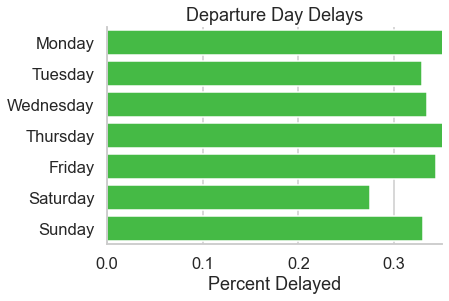

In [207]:
ax7=plt.subplots()
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax7=sns.barplot(data=depDay_delay, y='fl_day', x='delay_binary', color='limegreen', order=order)
sns.set_context('talk')
sns.set_style('whitegrid')
plt.xlabel('Percent Delayed')
plt.ylabel('')
plt.title('Departure Day Delays')
ax7.spines.right.set_visible(False)
ax7.spines.top.set_visible(False)
ax7.set_xlim(0,0.35)
plt.show()